In [91]:
#import libraries
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import os
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from collections import defaultdict
import matplotlib.pyplot as plt

In [47]:
df = pd.read_csv('data/vw.csv') #load data into pandas dataframe
df.head() #display first 5 rows
df.sample(n=5) #display 5 random rows
df_non_numeric = df.select_dtypes(exclude=[np.number]) #Finding the coloumns with categorical data
for col in df_non_numeric:
    if col!='transmission': continue
    prices = defaultdict(int)
    num = defaultdict(int)
    for idx, val in enumerate(df_non_numeric[col]):
        prices[val]+=df.at[idx,'price']
        num[val]+=1
    for key in prices:
        print(key, prices[key]/num[key])

    

Automatic 22589.52806122449
Manual 13709.165551661888
Semi-Auto 21654.315873015872


In [31]:
df.dropna(how = 'all', inplace = True) #removes rows which contain any blank cells
df_numeric = df.select_dtypes(include=[np.number]) #select coloumns which contain numeric data
for col in df_numeric:
    average =  np.average(df_numeric[col])
    standard_deviation = np.std(df_numeric[col])
    max_value = average + 3*standard_deviation
    min_value = average - 3*standard_deviation
    for idx, row_val in enumerate(df_numeric[col]):
        if min_value<row_val<max_value: #check if value is an outlier with average +- 3*s.d.
            continue
#             print(df.iloc[idx])

In [48]:
#One Hot Encoding
df_non_numeric = df.select_dtypes(exclude=[np.number]) #Finding the coloumns with categorical data

label = LabelEncoder()
for col in df_non_numeric:
    #Find the unique categories i.e (Manual, Semi-Auto and Automatics)
    s=set()
    for val in df_non_numeric[col]:
        s.add(val)
    s=list(s)
    int_data = label.fit_transform(s)
    int_data = int_data.reshape(len(int_data), 1)
    onehot_data = OneHotEncoder(sparse=False) 
    onehot_data = (onehot_data.fit_transform(int_data)) #Convert the categories into onehot data
    df[col] = np.array([onehot_data[s.index(val)] for val in df[col]]) #Add these categories to the dataset
    

-0.5176330103422336


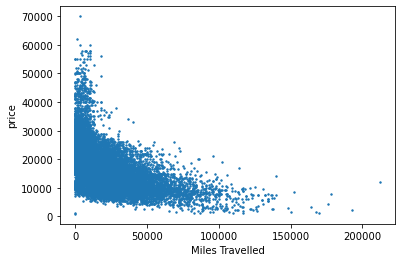

In [42]:
from matplotlib import pyplot as plt
y = df['price'].values
for col in df_numeric:
    if col != 'mileage': continue
    x = (df_numeric[col].values)
    zx = stats.zscore(x,axis=None)
    zy = stats.zscore(y,axis=None)
    print(sum(zx*zy)/(len(x)-1))
    fig=plt.figure()
    ax1 = fig.add_subplot()
    ax1.scatter(x,y, s=2)
    ax1.set_ylabel('price')
    ax1.set_xlabel('Miles Travelled')
    plt.show()



In [49]:
target_variable = ['price']
Predictors = ['model',	'year',	'transmission',	'mileage',	'fuelType',	'tax',	'mpg',	'engineSize']
X=df[Predictors].values
y=df[target_variable].values


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10609, 8)
(10609, 1)
(4548, 8)
(4548, 1)


Epoch 1/200
531/531 [==============================] - 1s 2ms/step - loss: 200241292.5564 - val_loss: 37605144.0000
Epoch 2/200
531/531 [==============================] - 1s 1ms/step - loss: 36828043.8158 - val_loss: 36607664.0000
Epoch 3/200
531/531 [==============================] - 1s 2ms/step - loss: 37094198.1917 - val_loss: 36656380.0000
Epoch 4/200
531/531 [==============================] - 1s 1ms/step - loss: 35598281.3271 - val_loss: 35139732.0000
Epoch 5/200
531/531 [==============================] - 1s 2ms/step - loss: 35813995.0376 - val_loss: 35055136.0000
Epoch 6/200
531/531 [==============================] - 1s 3ms/step - loss: 34175064.0940 - val_loss: 35264728.0000
Epoch 7/200
531/531 [==============================] - 1s 1ms/step - loss: 32470924.3289 - val_loss: 34492360.0000
Epoch 8/200
531/531 [==============================] - 1s 1ms/step - loss: 33681608.8271 - val_loss: 32684582.0000
Epoch 9/200
531/531 [==============================] - 1s 1ms/step - loss: 3279

KeyboardInterrupt: 

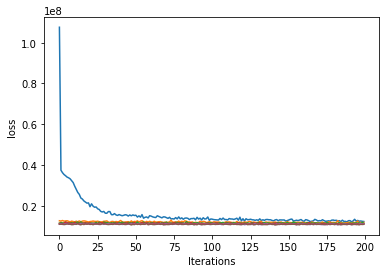

In [95]:
#define model
model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(8,)))
model.add(tf.keras.layers.Dense(8, kernel_initializer = 'normal', activation  = 'relu'))
model.add(tf.keras.layers.Dense(8, kernel_initializer = 'normal', activation  = 'relu'))
model.add(tf.keras.layers.Dense(8, kernel_initializer = 'normal', activation  = 'relu'))
model.add(tf.keras.layers.Dense(1, kernel_initializer = 'normal'))
with open('errors.txt','w') as f:
    for lr in np.arange(0.001, 0.05, 0.001):
        optimizer = tf.keras.optimizers.Adam(lr=0.005)
        model.compile(loss='mse', optimizer=optimizer)
        history = model.fit(X_train, y_train, batch_size = 20, epochs = 200, validation_data=(X_test, y_test))
        MAPE = np.mean(100 * (np.abs(y_test-model.predict(X_test))/y_test))
        RMSE = np.mean((np.sqrt((y_test-model.predict(X_test))**2)))
        f.write(f'{str(MAPE)} {str(RMSE)}\n')
        plt.plot(history.history['loss'])
        plt.ylabel('loss')
        plt.xlabel('Iterations')
        plt.savefig(f"/home/arvas/Math/IA/pictures/losses/loss_{lr}.png")

Epoch 1/300
531/531 [==============================] - 1s 2ms/step - loss: 177523388.3008 - val_loss: 37439240.0000
Epoch 2/300
531/531 [==============================] - 1s 2ms/step - loss: 38024325.5075 - val_loss: 38117620.0000
Epoch 3/300
531/531 [==============================] - 1s 2ms/step - loss: 37361803.6955 - val_loss: 34676124.0000
Epoch 4/300
531/531 [==============================] - 1s 2ms/step - loss: 35037913.2707 - val_loss: 34446472.0000
Epoch 5/300
531/531 [==============================] - 1s 2ms/step - loss: 33933328.5639 - val_loss: 33791220.0000
Epoch 6/300
531/531 [==============================] - 1s 2ms/step - loss: 33070789.5320 - val_loss: 32721096.0000
Epoch 7/300
301/531 [================>.............] - ETA: 0s - loss: 33115472.1794

KeyboardInterrupt: 

55.04566173289092


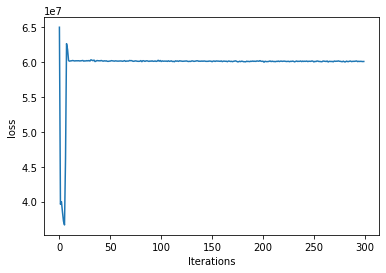

In [86]:
MAPE = np.mean(100 * (np.abs(y_test-model.predict(X_test))/y_test))
print(MAPE)
import matplotlib.pyplot as plt
# print(history.history.keys())
plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('Iterations')
plt.show()